In [2]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import seaborn as sn
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import os
import umap
import pandas as pd
import scipy
from scipy import stats
from scipy.spatial import distance
from scipy.cluster import hierarchy
import networkx as nx



In [3]:

#conda install -c conda-forge pycairo

import igraph as ig
import leidenalg as la

In [4]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
nodes=8
commonname='Big8Layers1EncoderReluSameData2Copy'
commonsub='-FactorLoadings.csv'
for i in range(1,9):
    for j in range(i+1,11):
    
        file1name1 = commonname+str(i)+commonsub
        file1name2 = commonname+str(j)+commonsub
        f1=pd.read_csv(file1name1)  
        f2=pd.read_csv(file1name2)  
        fcorr= pd.concat([f1, f2], axis=1)
        loadings=pd.DataFrame(data=fcorr)
        loading_corr=loadings.corr()
        short_loading_corr=loading_corr.iloc[nodes:nodes*2,0:nodes]
        #print(short_loading_corr.round(2))
        short_loading_corr_abs=short_loading_corr.abs()
        loading_corr=loadings.corr()
        short_loading_corr=loading_corr.iloc[nodes:nodes*2,0:nodes]
        #print(short_loading_corr.round(2))
        short_loading_corr_abs=short_loading_corr.abs()
 
        max_values_abs=short_loading_corr_abs.max(axis=0)
        max_values_idx=short_loading_corr_abs.idxmax(axis=0)
        max_values_idxrow=short_loading_corr_abs.idxmax(axis=0)
        max_values=max_values_abs.round(2)
        #max_values.sort_values( ascending = False, inplace = True)
        maxids=list(max_values.index)
        #print(max_values_idxrow)
        maxv=list(max_values)
        #print(maxids)
        #print(maxv)

        max_id_values=pd.DataFrame(data=maxv,index=maxids)
        max_id_values.insert(0,str(i)+'-'+str(j),max_values_idxrow,True)
        print(max_id_values)

In [ ]:
(0.97+0.94+0.58+0.99+0.51+0.91+0.79+0.71)/8
(0.97+0.95+0.98+1+0.85+0.76+0.11+0.99)/8


In [ ]:
os.getcwd()

In [40]:
# load data
data_read = pd.read_table('/Users/jianqiuzhang/Documents/Psychology/BIG5/data.csv')
#data_read = pd.read_table('/Users/jianqiuzhang/Documents/Psychology/duckworth-grit-scale-data/data.csv')

col_name = list(data_read.columns)
Big5_names = col_name[col_name.index('E1'):col_name.index('O10')+1]



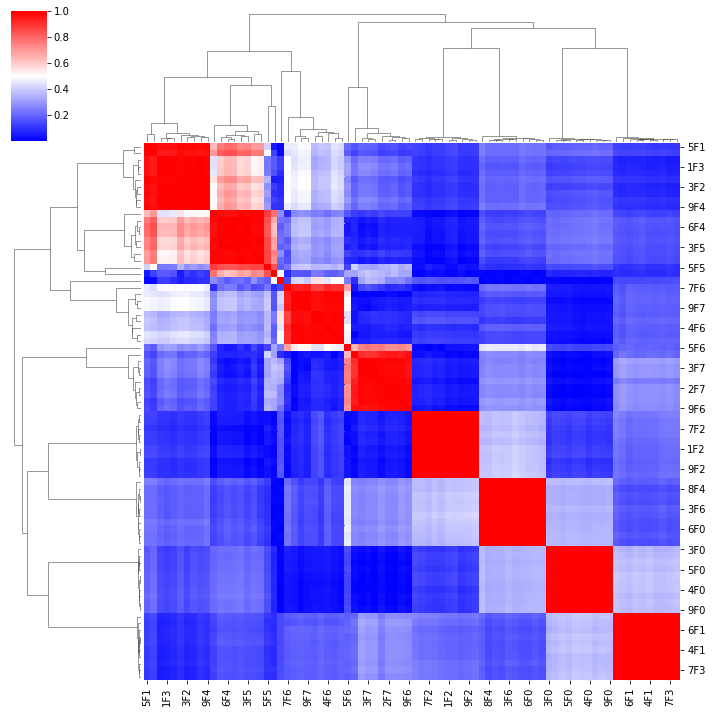

In [51]:
nodes=8
commonname='Big8Layers1Encoder100ReluData2Copy'
#commonname='Big10Layers1Encoder200ReluData2Copy'
commonsub='-FactorLoadings.csv'

col_names1= ['F0','F1','F2','F3','F4','F5','F6','F7']

col_names=col_names1
col_names_all=[]
for i in range(1,11):
    col_names1= ['F0','F1','F2','F3','F4','F5','F6','F7']
  #  print(col_names1)
    col_names=col_names1
    for k in range(0,nodes):
        col_names[k] = str(i)+col_names1[k]
    if(i==0):
        col_names_all=col_names
    else:
        col_names_all=col_names_all+col_names
#print(col_names_all)        

file1name1 = commonname+str(1)+commonsub
facLoad=pd.read_csv(file1name1) 
facLoad=facLoad.iloc[:,1:nodes+1]

rotator = Rotator()
facLoadRotate=rotator.fit_transform(facLoad)
facLoadR=pd.DataFrame(facLoadRotate)
for i in range(2,11):
    file1name = commonname+str(i)+commonsub
    currentfacLoad=pd.read_csv(file1name)     
    currentfacLoad=currentfacLoad.iloc[:,1:nodes+1]
    currentfacLoadRotate=rotator.fit_transform(currentfacLoad)
    currentfactLoadR=pd.DataFrame(currentfacLoadRotate)
    facLoadR= pd.concat([facLoadR, currentfactLoadR], ignore_index=True,axis=1)
    #print(facLoad)
facLoadR.columns=col_names_all
facLoadR.index=Big5_names
loading_corr=facLoadR.corr()   
loading_corr_abs=loading_corr.abs()   
clustergrid=sn.clustermap(loading_corr_abs, cmap='bwr',method='average')

In [47]:
facLoadR

,1F0,1F1,1F2,1F3,1F4,1F5,1F6,1F7,2F0,2F1,...,9F6,9F7,10F0,10F1,10F2,10F3,10F4,10F5,10F6,10F7
E1,0.944670,0.142067,0.018803,-0.002429,-0.088078,0.084280,0.120541,0.185449,0.110529,-0.002576,...,0.193751,0.112938,0.952926,-0.024949,0.106877,0.023027,0.076963,0.116291,-0.181230,-0.123525
E2,-0.965532,-0.213162,0.025358,-0.037342,-0.001338,-0.009874,0.011135,0.167919,-0.016383,0.047809,...,0.181982,-0.004525,-0.957140,0.054772,0.008500,0.036356,-0.016541,-0.205608,-0.168174,-0.010139
E3,0.830293,0.373821,0.173388,-0.031721,-0.349116,-0.025243,0.068324,0.097978,0.342566,0.021065,...,0.106671,0.080549,0.827264,0.020520,0.350897,0.174934,-0.021402,0.362561,-0.097075,-0.083016
E4,-0.953475,-0.102756,-0.045147,0.001999,0.201454,0.004103,0.075142,0.126855,-0.211643,0.012573,...,0.137874,0.074938,-0.951129,0.029310,-0.198541,-0.049441,-0.008417,-0.091996,-0.120915,-0.091483
E5,0.924294,0.326936,0.127693,0.081112,-0.115692,0.039924,0.042119,0.028071,0.128084,-0.083537,...,0.034002,0.054982,0.922702,-0.091075,0.112734,0.121918,0.025484,0.307082,-0.034327,-0.055098
E6,-0.846428,-0.230288,-0.060366,-0.255511,0.122703,-0.140227,0.120660,0.270278,-0.145370,0.283677,...,0.282195,0.106561,-0.843485,0.281407,-0.112123,-0.041730,-0.117426,-0.222864,-0.268225,-0.116189
E7,0.939417,0.261286,0.062375,0.036236,-0.155003,0.002135,0.058188,0.086517,0.166303,-0.048706,...,0.089736,0.058381,0.939725,-0.046503,0.149712,0.059844,-0.008316,0.240266,-0.079857,-0.072879
E8,-0.939706,0.067189,0.079373,0.079278,0.031148,-0.160436,0.049310,-0.009162,-0.047226,-0.066882,...,-0.014377,0.061742,-0.955268,-0.029605,-0.030678,0.085094,-0.162009,0.071289,0.017192,-0.065749
E9,0.941622,0.020695,-0.001783,0.060947,-0.062089,0.176020,0.073628,0.165441,0.074957,-0.068171,...,0.184020,0.059429,0.954035,-0.087447,0.082604,-0.006828,0.159450,0.004490,-0.162929,-0.064684
E10,-0.931055,-0.110932,-0.053123,0.005557,0.257149,0.001163,0.105004,0.060978,-0.263409,0.023040,...,0.069453,0.105361,-0.927001,0.022697,-0.251383,-0.061077,0.001804,-0.115405,-0.051875,-0.115049


In [48]:

latent_dim=nodes
factor_columns=['F0','F1','F2','F3','F4','F5','F6','F7']
base='Big8Layer1Relu100Data2Copy'
for filei in range(1,11):
    sorted_factor_loadings=facLoadR.iloc[0:50,(filei-1)*latent_dim:filei*latent_dim]
    sortAllF=pd.DataFrame(columns=factor_columns)
    #sorted_factor_loadings.columns=factor_columns
    for i in range(latent_dim):
       current_factor=sorted_factor_loadings.iloc[0:50,i]
       #print(current_factor)
       current_factor_abs=current_factor.abs()
       current_factor_abs.sort_values(axis = 0, ascending = False, inplace = True, na_position ='last')      
       idx=current_factor_abs[current_factor_abs>0.2].index
       sorted_currentFactor=current_factor.loc[idx]
       #print(sorted_currentFactor)

       current_sortAllF=sorted_factor_loadings.loc[idx] 
       #print(current_sortAllF) 
       if(len(sorted_currentFactor)>0):
          first=sorted_currentFactor.iloc[0]
          print(first) 
          if(sorted_currentFactor.iloc[0]<0):
             current_sortAllF *=(-1)
          length_cf=sorted_currentFactor.size
          #print(length_cf)
          if(length_cf>15):
             current_sortAllF_abs=current_sortAllF.abs()
             #print(current_sortAllF_abs)

             max_index = current_sortAllF_abs.idxmax(axis=1)
             #print(max_index)
             keep_idx = max_index[max_index == factor_columns[i]].index
             if(keep_idx.size > 10):    
                current_sortAllF=current_sortAllF.loc[keep_idx]
             else :
                current_sortAllF =current_sortAllF.iloc[0:15]
          print(current_sortAllF)
          current_sortAllF=current_sortAllF.round(2)
          sortAllF=sortAllF.append(current_sortAllF)
          #sortAllF=sortAllF.append(pd.DataFrame(data=factor_columns))
          sortAllF=sortAllF.append(pd.DataFrame(range(1)))
        
       #print(current_sortAllF)
    filename=base+str(filei)
    CurrentFilename=filename+'-FinalRotatedFactorLoadings'+'.csv'
    #print(sortAllF.columns)
    sortAllF.to_csv(CurrentFilename, index=True, header=True)

-0.965532070918559
          1F0       1F1       1F2       1F3       1F4       1F5       1F6  \
E2   0.965532  0.213162 -0.025358  0.037342  0.001338  0.009874 -0.011135   
E4   0.953475  0.102756  0.045147 -0.001999 -0.201454 -0.004103 -0.075142   
E1  -0.944670 -0.142067 -0.018803  0.002429  0.088078 -0.084280 -0.120541   
E9  -0.941622 -0.020695  0.001783 -0.060947  0.062089 -0.176020 -0.073628   
E8   0.939706 -0.067189 -0.079373 -0.079278 -0.031148  0.160436 -0.049310   
E7  -0.939417 -0.261286 -0.062375 -0.036236  0.155003 -0.002135 -0.058188   
E10  0.931055  0.110932  0.053123 -0.005557 -0.257149 -0.001163 -0.105004   
E5  -0.924294 -0.326936 -0.127693 -0.081112  0.115692 -0.039924 -0.042119   
E6   0.846428  0.230288  0.060366  0.255511 -0.122703  0.140227 -0.120660   
E3  -0.830293 -0.373821 -0.173388  0.031721  0.349116  0.025243 -0.068324   
A10 -0.545812 -0.679309 -0.247909 -0.030825  0.224180 -0.182096 -0.112356   
A2  -0.534103 -0.811412 -0.010769 -0.157164  0.086213 -0.

0.5805757371230615
         2F0       2F1       2F2       2F3       2F4       2F5       2F6  \
O4 -0.192036  0.637334 -0.181319 -0.037013  0.081468  0.364007  0.580576   
O2 -0.311647  0.703204 -0.046119 -0.078750 -0.023891  0.314602  0.519339   
N4  0.613966  0.166755 -0.021164  0.233886  0.158444 -0.087465  0.465454   
C2 -0.133554 -0.276643  0.085141  0.060892 -0.847630 -0.012318  0.339587   
C6 -0.215763 -0.117260  0.028285 -0.025145 -0.879406 -0.045422  0.315358   
A3 -0.410333 -0.232877 -0.694496  0.118026 -0.362050  0.070790  0.272413   
N5 -0.862980  0.245522 -0.027087 -0.118469 -0.198820 -0.027771  0.228313   
N2  0.835540 -0.050610  0.073450  0.160450 -0.086300 -0.094362  0.217512   

         2F7  
O4 -0.065564  
O2 -0.018627  
N4 -0.166782  
C2 -0.032656  
C6 -0.077110  
A3 -0.026623  
N5 -0.024875  
N2 -0.356730  
-0.590560012391871
          2F0       2F1       2F2       2F3       2F4       2F5       2F6  \
A1   0.135894 -0.270892  0.694284  0.094417  0.072006  0.045812 -

N5  -0.040013  
0.9773567194800754
          4F0       4F1       4F2       4F3       4F4       4F5       4F6  \
N6  -0.110443  0.067194  0.132432  0.110539  0.977357 -0.024444 -0.106288   
N1  -0.159460  0.102423  0.065094  0.067312  0.962637  0.020455 -0.093546   
N9  -0.102987 -0.198897  0.101998  0.002204  0.959207  0.021397 -0.152156   
N7  -0.043029 -0.055746  0.232985  0.011521  0.944993 -0.025786  0.060320   
N8  -0.061639 -0.076269  0.227221  0.029292  0.939980 -0.010958  0.075304   
N3  -0.196714  0.254931 -0.050192 -0.008066  0.904977 -0.009370 -0.095814   
N5  -0.102965 -0.008805  0.216032  0.251887  0.904032 -0.075893 -0.217920   
N10 -0.337830 -0.051373  0.245500 -0.105038  0.874442  0.037185  0.166178   
N2   0.145179  0.047683  0.055002 -0.062436 -0.869610 -0.064085 -0.214510   
N4   0.227273 -0.017407 -0.186002  0.158304 -0.660303 -0.148127 -0.477297   
C4  -0.087996 -0.053041  0.814110 -0.040257  0.526065  0.019779 -0.203221   
A3   0.130690 -0.671655  0.354516 -0.2131

0.9429208931555015
          6F0       6F1       6F2       6F3       6F4       6F5       6F6  \
C9  -0.004970 -0.138728  0.015762 -0.107359 -0.069112  0.942921 -0.033270   
C7  -0.100388 -0.051277 -0.115410  0.074517 -0.024479  0.917844 -0.156162   
C1   0.208634 -0.039171 -0.195833 -0.089742  0.028427  0.907734  0.059806   
C5   0.163103 -0.086166  0.161988 -0.137726 -0.049907  0.906211  0.162858   
C6  -0.230374 -0.052857 -0.096679  0.035892  0.060290 -0.870645  0.075245   
C2  -0.148571 -0.122208 -0.255947 -0.055869  0.040173 -0.841243  0.010197   
C10  0.060857 -0.140836 -0.360031 -0.056805  0.145226  0.814981  0.168721   
C8  -0.370158  0.234751  0.046517  0.144048 -0.048472 -0.800315  0.239091   
C4  -0.510306  0.046016 -0.044930  0.115787 -0.003727 -0.778434  0.057666   
C3   0.003361 -0.204889 -0.409232  0.070092  0.243240  0.758278  0.151021   
A3  -0.404793  0.673940 -0.209214 -0.149485 -0.044771 -0.322369 -0.024413   
O7   0.274477 -0.025336 -0.709029 -0.121086  0.278882  0.

-0.9480202750238307
          8F0       8F1       8F2       8F3       8F4       8F5       8F6  \
C9   0.089713  0.173735  0.013108  0.948020  0.011178 -0.036890 -0.188005   
C5   0.138989  0.131201 -0.141853  0.922241 -0.153310  0.165313  0.004354   
C7  -0.085464  0.059664  0.131651  0.914923  0.126816 -0.153600 -0.206839   
C1   0.069109  0.068737  0.235998  0.909027 -0.195403  0.057976 -0.150052   
C6  -0.023918  0.055540  0.130853 -0.886744  0.235237  0.063863 -0.313573   
C2   0.043641  0.103268  0.282392 -0.856026  0.156486  0.013068 -0.344087   
C8  -0.149384 -0.251334 -0.031383 -0.816111  0.366822  0.251679 -0.110607   
C4  -0.115655 -0.057795  0.070845 -0.795489  0.522351  0.067452 -0.220095   
C10  0.043577  0.187982  0.425183  0.795256 -0.029458  0.176645 -0.174729   
C3  -0.072593  0.229622  0.480069  0.737012  0.001729  0.164413 -0.120627   
A3   0.101989 -0.679243  0.259108 -0.335013  0.401147  0.014842 -0.301948   
O7   0.120583  0.052156  0.734138  0.279516 -0.241539  0

0.8395541757822058
          9F0       9F1       9F2       9F3       9F4       9F5       9F6  \
O6   0.151953 -0.089603 -0.013674 -0.134942 -0.317490  0.839554  0.055828   
O3  -0.043327 -0.131220  0.123965  0.132790  0.457603 -0.811114  0.037798   
O10 -0.276314  0.069383 -0.063610  0.092144  0.635951 -0.664877  0.088920   
O5  -0.303139  0.139463 -0.217786  0.028626  0.626617 -0.575140  0.159317   
O4   0.049118 -0.177976 -0.096728 -0.169096 -0.615623  0.337110  0.061765   
O2   0.100805 -0.306252  0.018217 -0.034344 -0.685200  0.303339  0.016561   
O7  -0.145925  0.275686 -0.296613  0.044056  0.760589 -0.226047  0.301710   
O9   0.251195 -0.324097 -0.056403  0.406771  0.688358 -0.221358 -0.093313   

          9F7  
O6   0.172403  
O3  -0.005786  
O10  0.057497  
O5   0.150136  
O4   0.599433  
O2   0.527735  
O7  -0.034210  
O9  -0.001853  
0.6017256872877665
          9F0       9F1       9F2       9F3       9F4       9F5       9F6  \
A1   0.059169 -0.120588  0.046672 -0.670239 -0.

         10F0      10F1      10F2      10F3      10F4      10F5      10F6  \
A1   0.086402 -0.218651  0.123853  0.071207 -0.055800  0.716646  0.559785   
N2  -0.160281  0.046012 -0.865062  0.059466 -0.073335 -0.055841  0.335680   
O7  -0.143875  0.749982 -0.264376 -0.298551 -0.164548 -0.026096  0.328908   
A10 -0.542707  0.052650 -0.248717 -0.246502 -0.143271 -0.659183  0.293413   
E6   0.843485 -0.281407  0.112123  0.041730  0.117426  0.222864  0.268225   
A7   0.451804 -0.053144  0.128393  0.030714 -0.002003  0.832434  0.232283   
N7   0.031074 -0.017902  0.933704  0.244670 -0.016593  0.066984  0.227571   
C8   0.128525 -0.063948  0.397703  0.804252  0.024314  0.242809  0.227173   
N8   0.043701 -0.023453  0.927165  0.249081 -0.004219  0.084107  0.222413   
C3   0.055630  0.471864 -0.012583 -0.728948 -0.130072 -0.211401  0.221874   
C10 -0.050128  0.408398 -0.068717 -0.793046 -0.053872 -0.151491  0.219802   
A5   0.240634 -0.036387  0.016572  0.002023 -0.025608  0.930394  0.211190   

/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


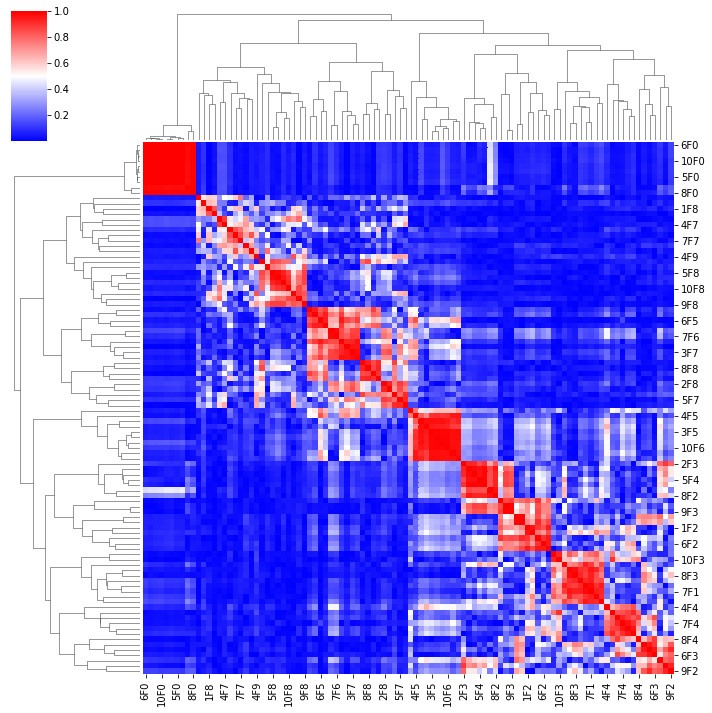

In [95]:
nodes=10
commonname='Big10Layers1Encoder200ReluData2Copy'
commonsub='-FactorLoadings.csv'

col_names1= ['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9']

col_names=col_names1
col_names_all=[]
for i in range(1,11):
    col_names1= ['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9']
  #  print(col_names1)
    col_names=col_names1
    for k in range(0,nodes):
        col_names[k] = str(i)+col_names1[k]
    if(i==0):
        col_names_all=col_names
    else:
        col_names_all=col_names_all+col_names
#print(col_names_all)        

file1name1 = commonname+str(1)+commonsub
facLoad=pd.read_csv(file1name1) 
facLoad=facLoad.iloc[:,1:nodes+1]

for i in range(2,11):
    file1name = commonname+str(i)+commonsub
    currentfacLoad=pd.read_csv(file1name)     
    facLoad= pd.concat([facLoad, currentfacLoad.iloc[:,1:nodes+1]], ignore_index=True,axis=1)
    #print(facLoad)
facLoad.columns=col_names_all
loading_corr=facLoad.corr()   
loading_corr_abs=loading_corr.abs()   
clustergrid=sn.clustermap(loading_corr_abs, cmap='bwr',method='average')



In [11]:
#extracts the indices from the correlation matrix, which are the factors
factors = loading_corr.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(loading_corr_abs)

#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: factors[x])

#shows the edges with their corresponding weights
#G.edges(data=True)


In [12]:
def create_corr_network(G, min_correlation_abs):
    H = G.copy()
##Checks all the edges and removes some based on corr_direction
    for factor1, factor2, weight in G.edges(data=True):
        weight_abs=abs(weight['weight'])
        #print(weight_abs)
        
        if weight_abs < min_correlation_abs or weight_abs==1:
                H.remove_edge(factor1, factor2)
    return H            
       

In [13]:
 NewG=create_corr_network(G,0.875)
nx.write_graphml(NewG,'graph.graphml') # Export NX graph to file

Gix = ig.read('graph.graphml',format="graphml") 

In [14]:
partition = la.find_partition(Gix, la.ModularityVertexPartition)


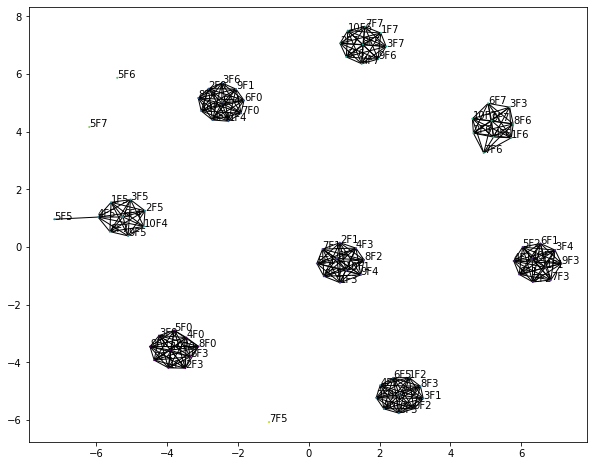

In [15]:
visual_style = {}
visual_style["vertex_size"] = 1
visual_style["vertex_label"] = col_names_all
visual_style["bbox"] = (8000, 8000)
visual_style["margin"] = 400
visual_style["label_size"]=50
fig, ax = plt.subplots(figsize=(10,8))
ig.plot(partition, target=ax,**visual_style)
plt.savefig('Big8Relu100DataRotatedClusters875.pdf',dpi=400)

In [49]:
print(partition)
factor_df=pd.DataFrame(col_names_all)
lp=len(partition)
for i in range(lp):
    ids=partition[i]
    number_of_factors=len(ids)
    totaln=number_of_factors*number_of_factors
    totaln2=totaln-number_of_factors
    factorNames=factor_df.iloc[ids]
    print(factorNames)
    #print(ids)
    loading_reordered=loading_corr.iloc[ids,ids]    
    loading_reordered_abs=loading_reordered.abs()
    print((loading_reordered_abs.mean().mean()*(totaln)-number_of_factors)/totaln2)
    #print(loading_reordered)

Clustering with 80 elements and 11 clusters
[ 0] 0, 11, 16, 24, 32, 43, 52, 56, 64, 72
[ 1] 1, 10, 20, 25, 34, 41, 51, 57, 67, 77
[ 2] 3, 9, 18, 27, 33, 42, 49, 58, 68, 73
[ 3] 4, 8, 22, 28, 36, 40, 48, 60, 65, 74
[ 4] 2, 12, 17, 26, 35, 45, 50, 59, 66, 75
[ 5] 5, 13, 21, 29, 37, 44, 63, 69, 76
[ 6] 7, 15, 23, 31, 46, 55, 61, 70, 78
[ 7] 6, 14, 19, 30, 47, 54, 62, 71, 79
[ 8] 38
[ 9] 39
[10] 53
       0
0    1F0
11   2F3
16   3F0
24   4F0
32   5F0
43   6F3
52   7F4
56   8F0
64   9F0
72  10F0
0.9994699401220066
       0
1    1F1
10   2F2
20   3F4
25   4F1
34   5F2
41   6F1
51   7F3
57   8F1
67   9F3
77  10F5
0.9991874192726881
       0
3    1F3
9    2F1
18   3F2
27   4F3
33   5F1
42   6F2
49   7F1
58   8F2
68   9F4
73  10F1
0.9876871155852969
       0
4    1F4
8    2F0
22   3F6
28   4F4
36   5F4
40   6F0
48   7F0
60   8F4
65   9F1
74  10F2
0.9991357281201882
       0
2    1F2
12   2F4
17   3F1
26   4F2
35   5F3
45   6F5
50   7F2
59   8F3
66   9F2
75  10F3
0.9988987066658795
       0
5  

/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [ ]:

#import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ig.plot(partition, target=ax)

plt.savefig('SameDataClusters87',dpi=400)



In [ ]:
col_names1= ['F0','F1','F2','F3','F4','F5','F6','F7']

col_names=col_names1
col_names_all=[]
for i in range(1,11):
    col_names1= ['F0','F1','F2','F3','F4','F5','F6','F7']
  #  print(col_names1)
    col_names=col_names1
    for k in range(0,8):
        col_names[k] = str(i)+col_names1[k]
    if(i==0):
        col_names_all=col_names
    else:
        col_names_all=col_names_all+col_names
#print(col_names_all) 
idF4=col_names_all.index('7F4')
col_names_all[idF4]='  C-Irritability'
idF1=col_names_all.index('5F1')
col_names_all[idF1]='  Intelligence'
idF3=col_names_all.index('9F3')
col_names_all[idF3]='  N-Impulsitivity'
idF32=col_names_all.index('4F3')
col_names_all[idF32]='  Agreeableness'
idF2=col_names_all.index('5F2')
col_names_all[idF2]='  C-Introversion'
idF6=col_names_all.index('9F6')
col_names_all[idF6]='  LinguisticIQ'
idF5=col_names_all.index('4F6')
col_names_all[idF5]='  Indifference-Relaxation'
idF0=col_names_all.index('7F0')
col_names_all[idF0]='     E-Positive Affect'
idF7=col_names_all.index('8F7')
col_names_all[idF7]='  ImaginationIQ'


In [ ]:
data_umap = umap.UMAP(n_neighbors=5, min_dist=.01)
embedding = pd.DataFrame(data_umap.fit_transform(facLoad.transpose()), columns=['UMAP1', 'UMAP2'])
sns_plot = sn.scatterplot(x='UMAP1', y='UMAP2', data=embedding)

In [ ]:
import umap.plot
umap.plot.diagnostic(data_umap, diagnostic_type='pca')


In [ ]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(embedding)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(embedding)

In [ ]:
plt.scatter(embedding.iloc[:,0], embedding.iloc[:,1], c=kmeans.labels_[:], s=1, cmap='Spectral');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=1, c='black')
plt.show()

In [ ]:
(0.97+0.98+1+0.99+0.97+0.94+0.99+0.91)/8

In [ ]:
nodes=9
f1=pd.read_csv('Big9Layers1EncoderReluData2Copy3-FactorLoadings.csv')  
f2=pd.read_csv('Big9Layers1EncoderReluData2Copy4-FactorLoadings.csv')  
fcorr= pd.concat([f1, f2], axis=1)
loadings=pd.DataFrame(data=fcorr)

loading_corr=loadings.corr()
short_loading_corr=loading_corr.iloc[nodes:nodes*2,0:nodes]
print(short_loading_corr)
short_loading_corr_abs=short_loading_corr.abs()

max_values_abs=short_loading_corr_abs.max(axis=0)
max_values=max_values_abs.round(2)
max_values.sort_values( ascending = False, inplace = True)
print(max_values)